In [1]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import os

/home/issa-sangare/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
path = 'eren_rgb.jpg'
path1 = 'text1.txt'
path2 = 'reconstiued1.jpg'
num_rows = 2
num_colors = 64

# (-) $Caractéristiques$ $de$ $l'image$

In [3]:
def details(path):
    img = Image.open(path)
    size = img.size
    format = img.format
    mode = img.mode
    resolution = img.info.get('dpi')
    definition = size[0] * size[1]
    definition2 = size
    if resolution is not None:
        size = (size[0]/ resolution[0], size[1] / resolution[1])
    else:
        size = (0, 0)  # or any default resolution you want to use
    
    poids = os.path.getsize(path) / (1000.0)  # Convert to kilobytes
    
    if mode == 'RGB':
        trsc = definition * 3 * img.bits
    else:
        trsc = definition * 1 * img.bits
    
    trsc /= (1024 * 8)
    
    taux_compression = 100 * (1 - (poids/trsc))
        
    return size, format, mode, resolution, definition, definition2, poids, trsc, taux_compression


# Exemple d'utilisation
result = details(path)
print("Size (inch):", result[0])
print("Format:", result[1])
print("Mode:", result[2])
print("Resolution:", result[3])
print("Definition (pixels):", result[4])
print("Définition (L * C):", result[5])
print("Taille en mémoire avec compression:", result[6], "KB")
print("Taille réelle sans compression:", result[7]/1024, "MB")
print("Taux de compression: ", result[8], "%")

Size (inch): (0, 0)
Format: JPEG
Mode: RGB
Resolution: None
Definition (pixels): 49728
Définition (L * C): (224, 222)
Taille en mémoire avec compression: 12.665 KB
Taille réelle sans compression: 0.14227294921875 MB
Taux de compression:  91.3067353067353 %


# (1). $Création$ $de$ $la$ $palette$ $de$ $couleurs$

### (a). $Sens$ $normal$

In [4]:
def create_color_palette(image, num_colors):
    # Convertir l'image en un tableau 2D de pixels
    pixels = np.reshape(image, (-1, 3))  # (nombre de pixels, 3 canaux de couleur)

    # Appliquer l'algorithme de k-means clustering
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)

    # Obtenir les centres des clusters (couleurs dominantes)
    color_palette = kmeans.cluster_centers_.astype(int)

    # Associer chaque pixel à l'indice de couleur dans la palette
    labels = kmeans.predict(pixels)

    # Reformater les indices des couleurs dans la palette selon la forme de l'image originale
    palette_indices = np.reshape(labels, image.shape[:2])

    return color_palette, palette_indices

### (b). $Sens$ $inverse$

In [5]:
def inverse_color_palette(color_palette, palette_indices):
    # Récupérer les dimensions de l'image à partir des indices de palette
    height, width = palette_indices.shape

    # Initialiser une image vide avec les dimensions récupérées
    reconstructed_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Remplir l'image reconstruite avec les couleurs de la palette
    for i in range(height):
        for j in range(width):
            color_index = palette_indices[i, j]
            reconstructed_image[i, j] = color_palette[color_index]

    return reconstructed_image

### (c). $Application$

/home/issa-sangare/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


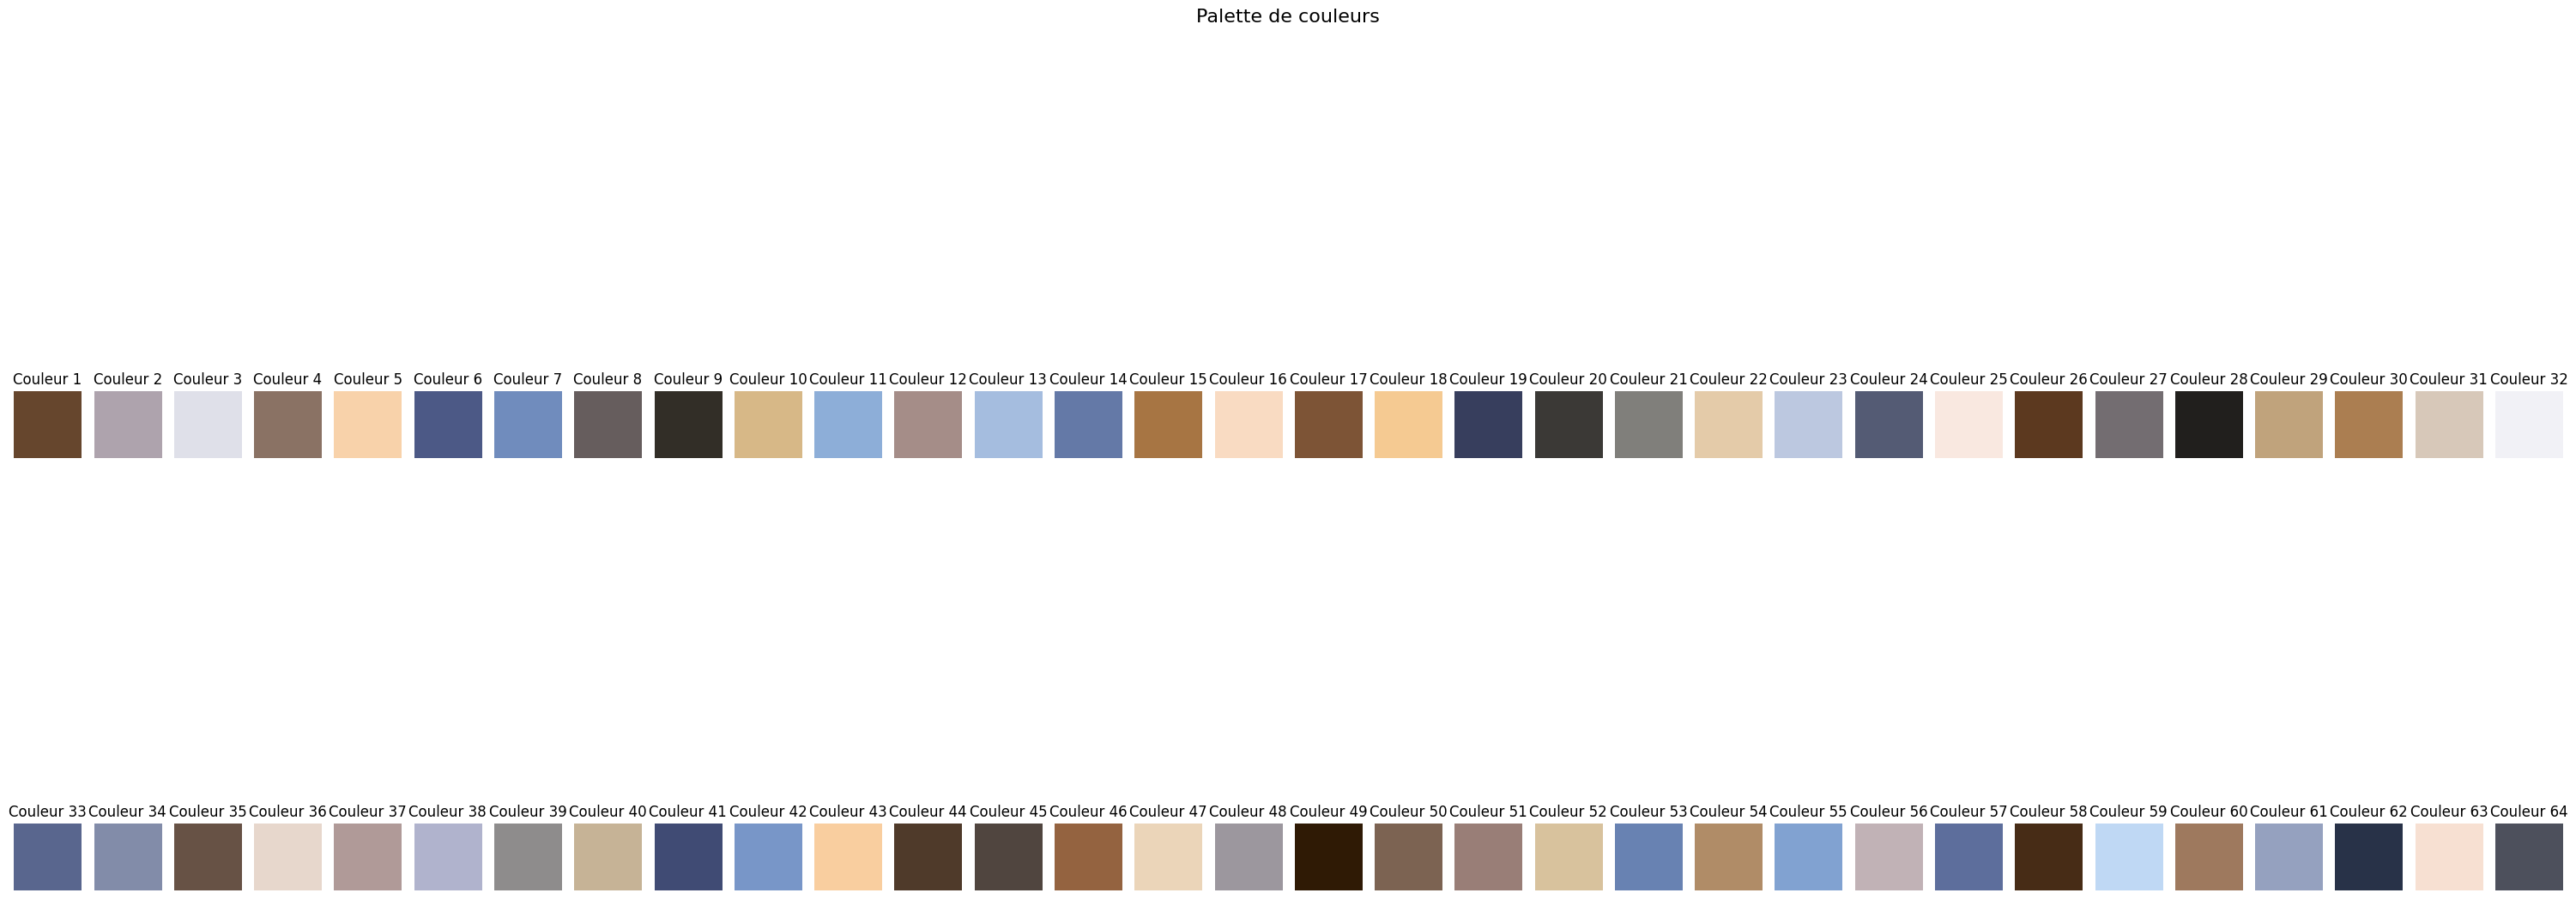

In [6]:
# Charger l'image d'exemple
image = io.imread(path)

color_palette, palette_indices = create_color_palette(image, num_colors)
image1 = color_palette[palette_indices]

num_cols = num_colors // num_rows
plt.figure(figsize=(30, 15))
for i, color in enumerate(color_palette):
    plt.subplot(num_rows, num_cols, i + 1)
    color_patch = np.zeros((100, 100, 3), dtype=np.uint8)
    color_patch[:, :] = color
    plt.imshow(color_patch)
    plt.title(f'Couleur {i+1}')
    plt.axis('off')
plt.suptitle('Palette de couleurs', fontsize=16)
plt.tight_layout()
plt.show()

In [7]:
print(np.array(color_palette[palette_indices]))

[[[165 189 223]
  [165 189 223]
  [165 189 223]
  ...
  [191 216 244]
  [191 216 244]
  [191 216 244]]

 [[141 174 216]
  [141 174 216]
  [165 189 223]
  ...
  [191 216 244]
  [191 216 244]
  [191 216 244]]

 [[141 174 216]
  [141 174 216]
  [141 174 216]
  ...
  [191 216 244]
  [191 216 244]
  [223 224 233]]

 ...

 [[198 179 150]
  [198 179 150]
  [216 194 157]
  ...
  [102  93  93]
  [115 109 113]
  [128 127 123]]

 [[228 203 169]
  [228 203 169]
  [216 194 157]
  ...
  [102  93  93]
  [ 50  46  39]
  [ 33  31  29]]

 [[228 203 169]
  [228 203 169]
  [228 203 169]
  ...
  [231 215 204]
  [193 178 182]
  [174 163 173]]]


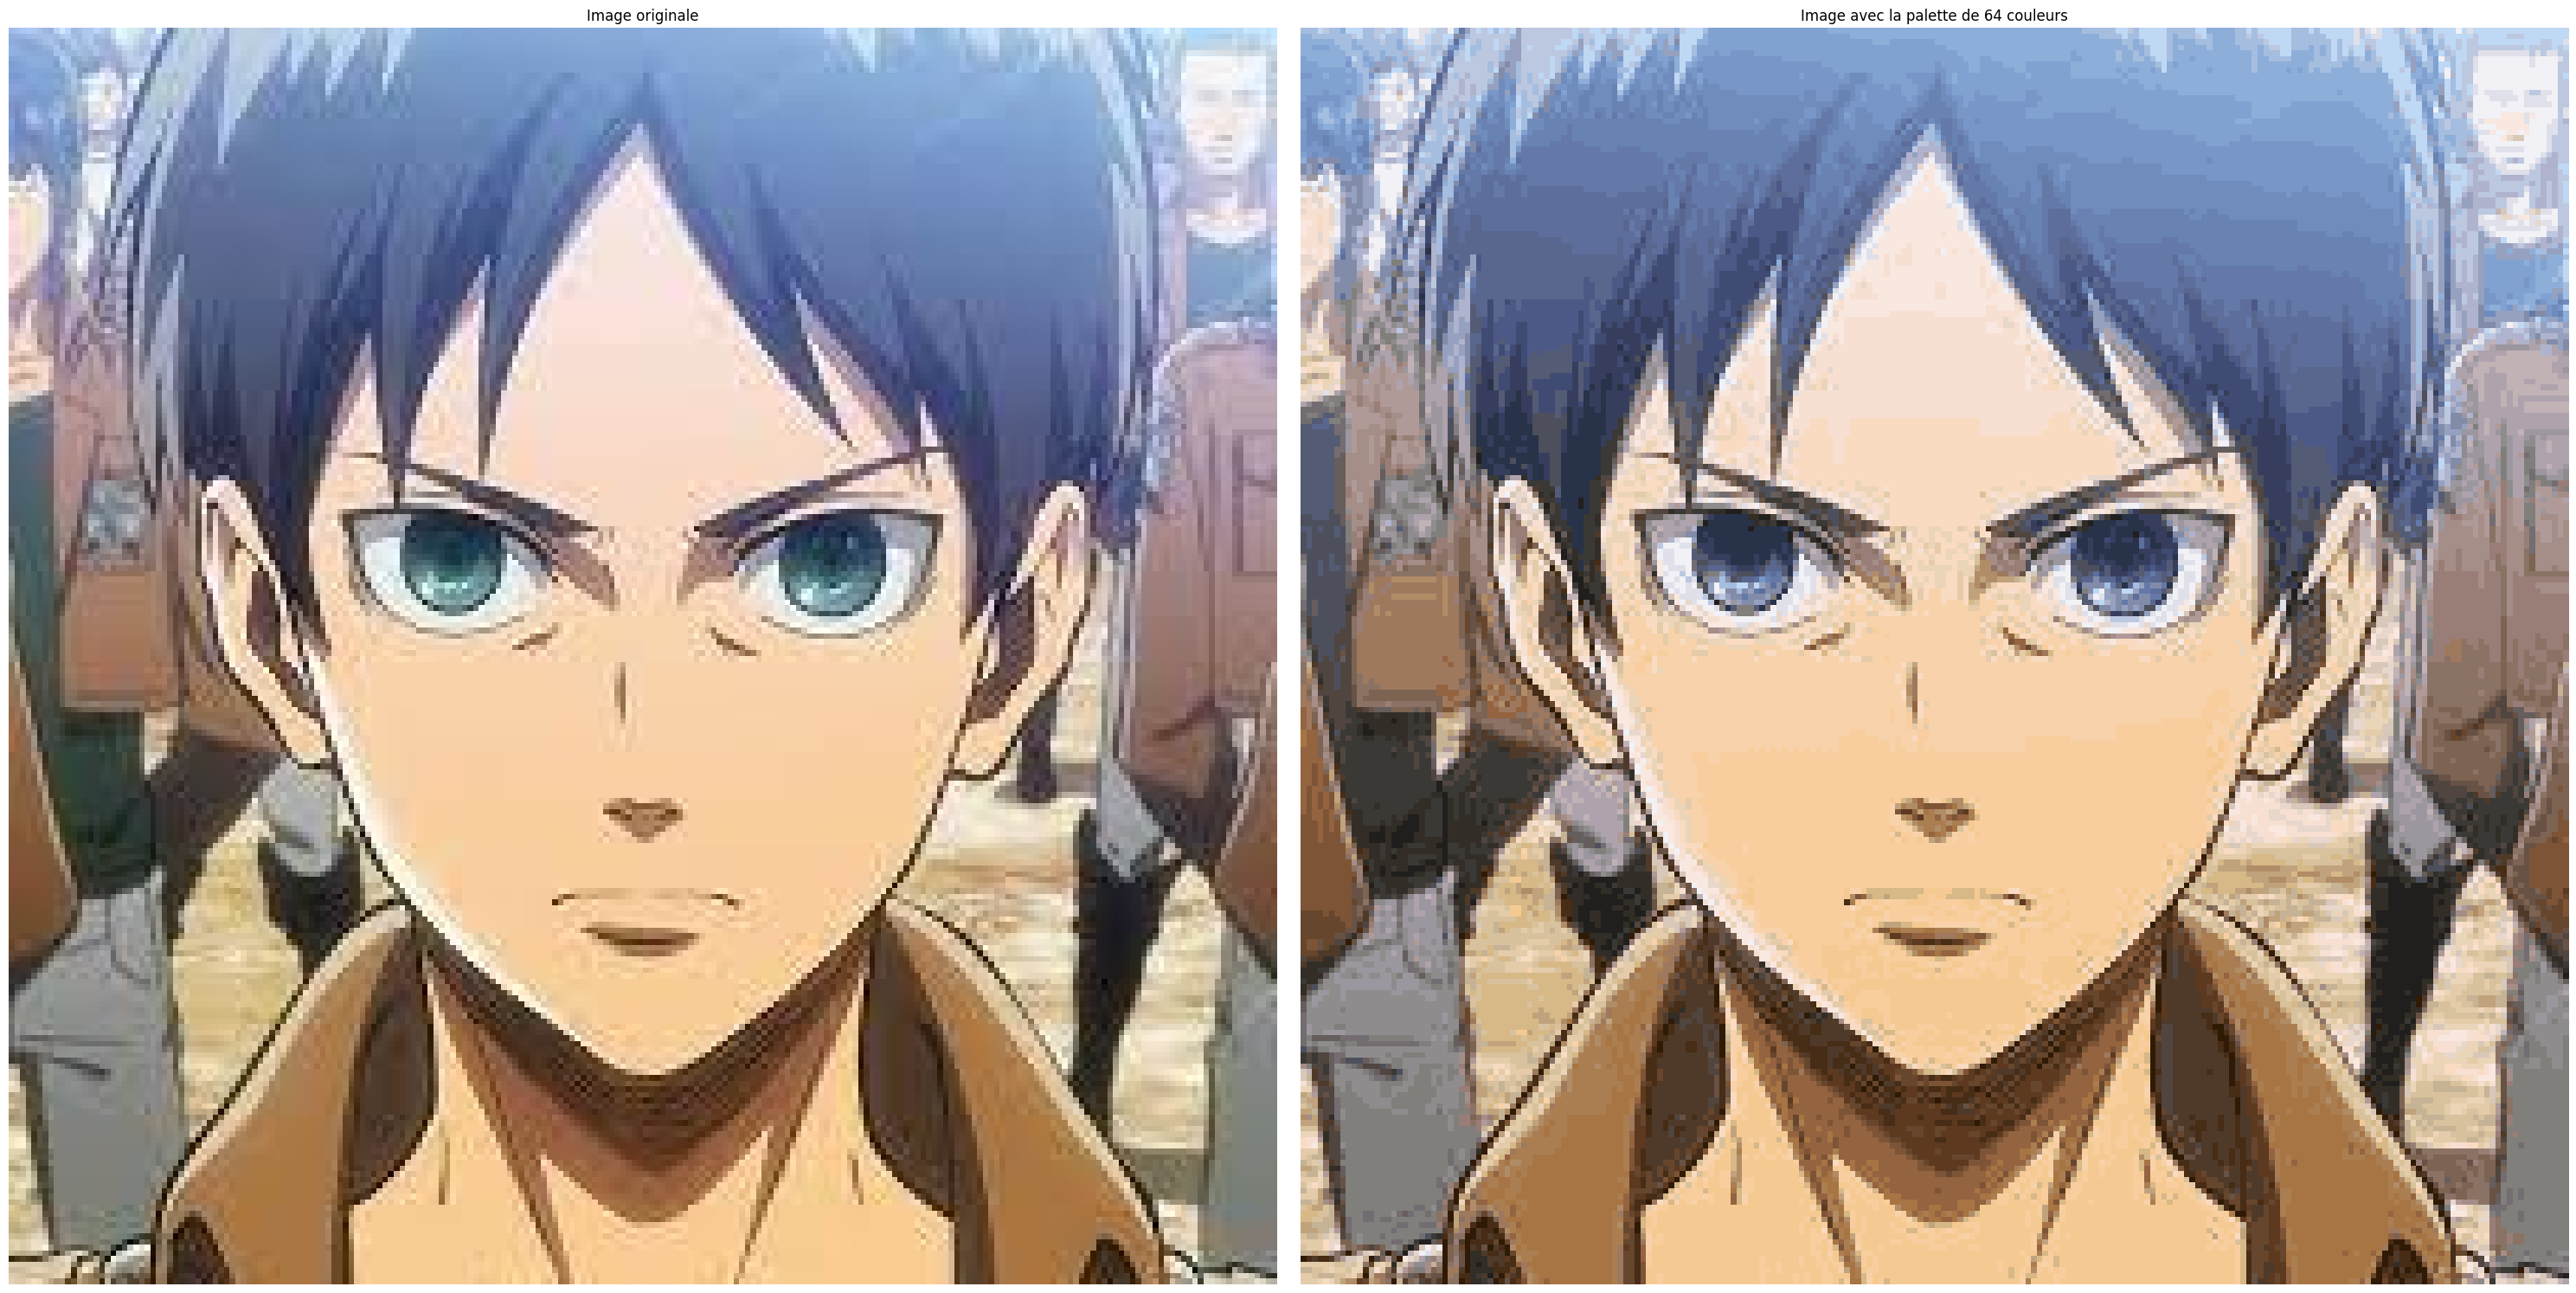

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(30, 15))
fig.subplots_adjust(wspace=0.01)

axs[0].imshow(image)
axs[0].set_title('Image originale')
axs[0].axis('off')

axs[1].imshow(image1)
axs[1].set_title(f'Image avec la palette de {num_colors} couleurs')
axs[1].axis('off')

fig.tight_layout()

plt.show()

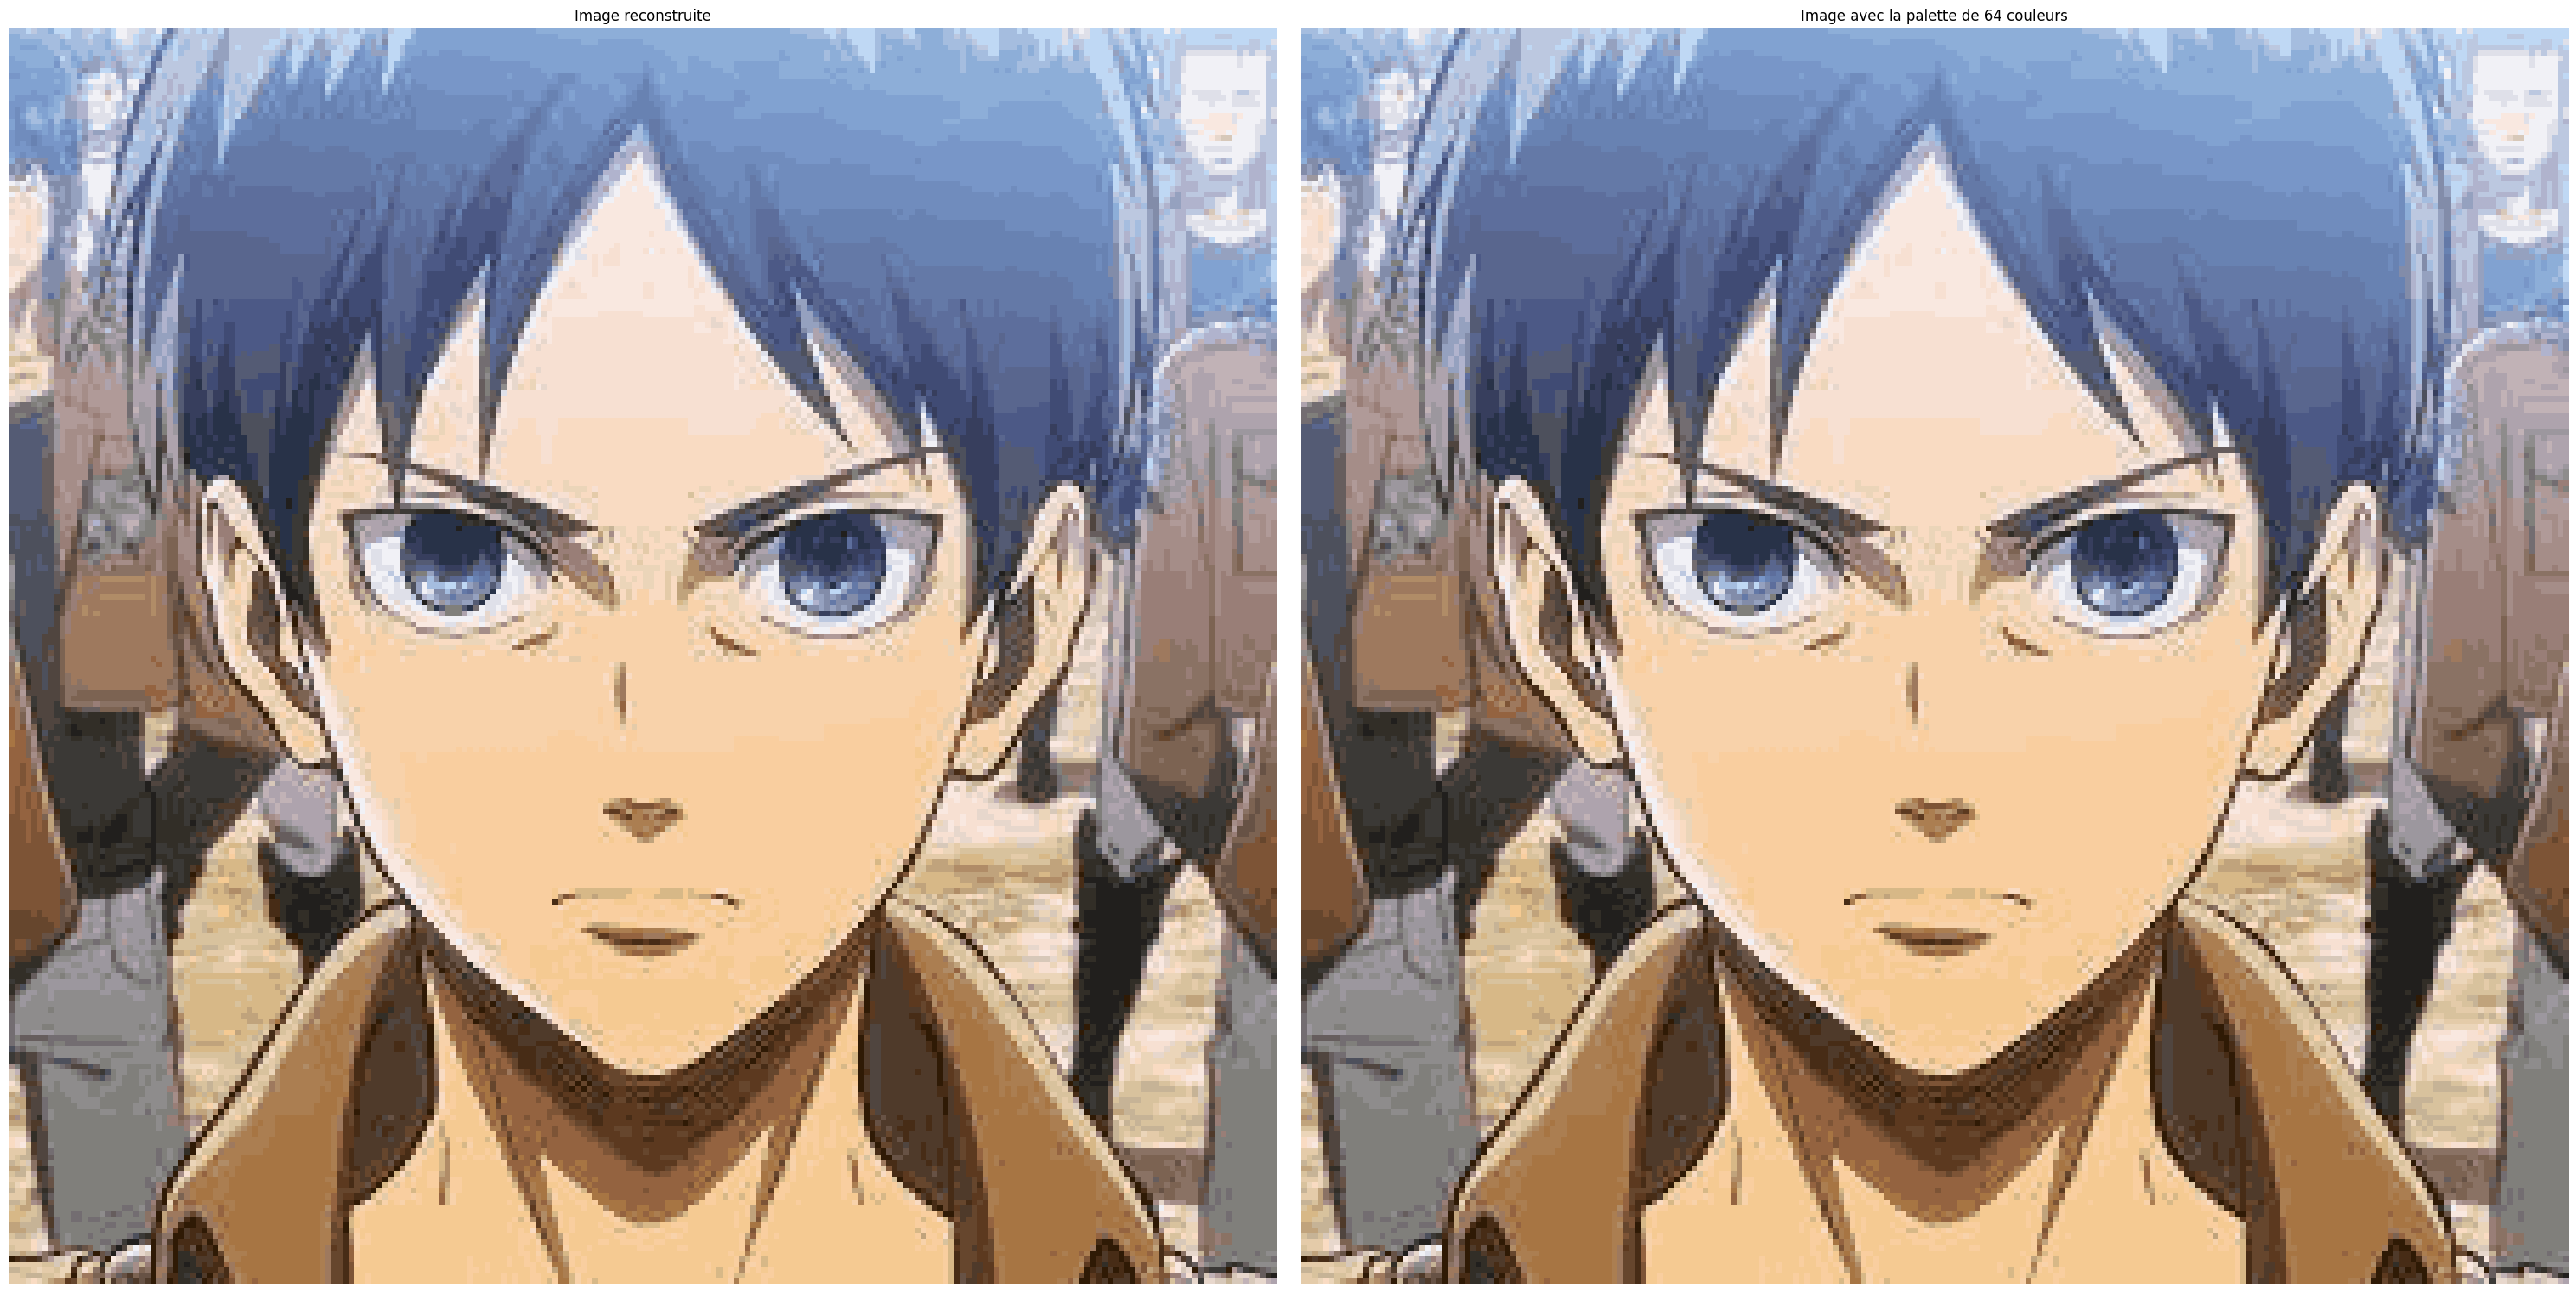

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(30, 15))
fig.subplots_adjust(wspace=0.01)

reconstructed_image = inverse_color_palette(color_palette, palette_indices)

axs[0].imshow(reconstructed_image)
axs[0].set_title('Image reconstruite')
axs[0].axis('off')

axs[1].imshow(image1)
axs[1].set_title(f'Image avec la palette de {num_colors} couleurs')
axs[1].axis('off')

fig.tight_layout()

plt.show()

# (2). $Mappage$ $des$ $pixels$ $de$ $l'image$

### (a). $Sens$ $normal$

In [10]:
def map_to_palette(image, color_palette):
    pixels = np.reshape(image, (-1, 3))  # (nombre de pixels, 3 canaux de couleur)

    # Calculer la distance de chaque pixel à chaque couleur de la palette
    distances = np.linalg.norm(pixels[:, np.newaxis] - color_palette, axis=2)

    # Obtenir l'indice de la couleur la plus proche pour chaque pixel
    indices = np.argmin(distances, axis=1)

    # Reformater les indices des couleurs selon la forme de l'image originale
    mapped_indices = np.reshape(indices, image.shape[:2])

    return mapped_indices.flatten(), np.array(image).shape

### (b). $Sens$ $inverse$

In [11]:
def inverse_map_to_palette(mapped_indices, color_palette, image_shape):
    # Convertir les indices mappés en tableau NumPy si ce n'est pas déjà le cas
    mapped_indices = np.asarray(mapped_indices)

    # Réorganiser les couleurs de la palette en fonction des indices mappés
    image_colors = color_palette[mapped_indices]

    # Reformater les couleurs en une image selon la forme donnée
    reconstructed_image = np.reshape(image_colors, image_shape)

    return reconstructed_image, color_palette

### (c). $Application$

In [12]:
alphabet = [str(i) for i in range(len(color_palette))]
data, shape = map_to_palette(image, color_palette)
print(len(np.array(image1)))
print(np.array(image1)[0:5])
print(data[0:100])

atad, _ = inverse_map_to_palette(data, color_palette, shape)
print(atad[0:5], "\n")
print(len(atad))

222
[[[165 189 223]
  [165 189 223]
  [165 189 223]
  ...
  [191 216 244]
  [191 216 244]
  [191 216 244]]

 [[141 174 216]
  [141 174 216]
  [165 189 223]
  ...
  [191 216 244]
  [191 216 244]
  [191 216 244]]

 [[141 174 216]
  [141 174 216]
  [141 174 216]
  ...
  [191 216 244]
  [191 216 244]
  [223 224 233]]

 [[141 174 216]
  [141 174 216]
  [129 162 209]
  ...
  [191 216 244]
  [188 200 224]
  [191 216 244]]

 [[141 174 216]
  [141 174 216]
  [141 174 216]
  ...
  [223 224 233]
  [188 200 224]
  [188 200 224]]]
[12 12 12 58 22 12 12 10 58 58 58 12 12 22 22 58 22 12 58 31 31  2  2 58
 22 22 31 12 13 60 22 58 22 58 12 58 22 58 60 22 22 22 22 22 22 22 22 22
 58 22 22 58 58 22 58 12 58 58 22 22 58 12 58 12 12 12 10 22 58 58 58 12
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 10 10 10
 10 10 10 10]
[[[165 189 223]
  [165 189 223]
  [165 189 223]
  ...
  [191 216 244]
  [191 216 244]
  [191 216 244]]

 [[141 174 216]
  [141 174 216]
  [165 189 223]
  ...
  [191 216 2

# (3). $Codage$ $LZW$

### (-). $Fonctions$ $intermédiaires$

In [13]:
def fusionner(liste):
    tailles = []
    nombres_fusionnes = ""
    
    # Parcourir tous les éléments de la liste
    for nombre in liste:
        # Convertir chaque nombre en chaîne de caractères et l'ajouter à la chaîne fusionnée
        nombres_fusionnes += str(nombre)
        
        # Ajouter la taille de l'élément à la liste des tailles
        tailles.append(len(str(nombre)))
    
    # Retourner la chaîne de caractères fusionnée et la liste des tailles
    return nombres_fusionnes, tailles

In [14]:
def separer(chaine, tailles):
    nombres = []
    debut = 0
    
    # Parcourir toutes les tailles dans la liste
    for taille in tailles:
        # Extraire le sous-chaîne correspondant à la taille actuelle
        sous_chaine = chaine[debut:debut+taille]
        
        # Convertir la sous-chaîne en nombre et l'ajouter à la liste des nombres
        nombres.append(int(sous_chaine))
        
        # Mettre à jour la position de départ pour la prochaine sous-chaîne
        debut += taille
    
    # Retourner la liste des nombres
    return nombres

### (a). $Sens$ $normal$

In [15]:
def encoding_lzw(data, alphabet):
    data_fused, taille = fusionner(data)  # Fusionner les chaînes de caractères
    encoded_data = []

    dictionary = {}  # Initialiser le dictionnaire avec les caractères de l'alphabet spécifié
    for i, char in enumerate(alphabet):
        dictionary[char] = i

    prefix = ''
    for char in data_fused:
        new_entry = prefix + char
        if new_entry in dictionary:
            prefix = new_entry
        else:
            encoded_data.append(dictionary[prefix])
            dictionary[new_entry] = len(dictionary)
            prefix = char

    if prefix:
        encoded_data.append(dictionary[prefix])

    return encoded_data, taille

### (b). $Sens$ $inverse$

In [16]:
def decoding_lzw(compressed_data, alphabet, tailleL):
    result = []
    dictionary = {}
    current_code = len(alphabet)

    # Initialiser le dictionnaire avec les caractères de l'alphabet spécifié
    for i, char in enumerate(alphabet):
        dictionary[i] = char

    old_entry = dictionary[compressed_data[0]]
    result.append(old_entry)
    for new_entry in compressed_data[1:]:
        if new_entry in dictionary:
            entry = dictionary[new_entry]
        elif new_entry == current_code:
            entry = old_entry + old_entry[0]
        else:
            raise ValueError("Mauvaise séquence compressée")

        result.append(entry)

        # Utilisez le même dictionnaire pour la décompression
        dictionary[current_code] = old_entry + entry[0]
        current_code += 1
        old_entry = entry

    result = ''.join(result)
    result = separer(result, tailleL)
    
    return result

### (c). $Application$

In [17]:
encoded_data, taille = encoding_lzw(data, alphabet)
print(encoded_data[0:100], "\n")
print(len(encoded_data), "\n")

decoded_data = decoding_lzw(encoded_data, alphabet, taille)
print(decoded_data[0:100], "\n")

[12, 64, 25, 8, 22, 65, 10, 58, 71, 8, 65, 22, 22, 58, 68, 66, 31, 31, 76, 67, 75, 31, 64, 36, 0, 82, 82, 12, 77, 66, 60, 75, 95, 96, 97, 92, 82, 92, 58, 91, 8, 99, 66, 103, 69, 21, 88, 66, 72, 91, 45, 114, 54, 116, 115, 118, 117, 120, 119, 122, 10, 124, 0, 125, 127, 126, 129, 128, 131, 130, 133, 132, 135, 134, 137, 136, 135, 21, 141, 108, 72, 78, 72, 146, 73, 142, 149, 112, 138, 126, 141, 102, 111, 104, 157, 112, 150, 148, 147, 147] 

15379 

[12, 12, 12, 58, 22, 12, 12, 10, 58, 58, 58, 12, 12, 22, 22, 58, 22, 12, 58, 31, 31, 2, 2, 58, 22, 22, 31, 12, 13, 60, 22, 58, 22, 58, 12, 58, 22, 58, 60, 22, 22, 22, 22, 22, 22, 22, 22, 22, 58, 22, 22, 58, 58, 22, 58, 12, 58, 58, 22, 22, 58, 12, 58, 12, 12, 12, 10, 22, 58, 58, 58, 12, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 10, 10, 10, 10, 10, 10, 10] 



# $APPLICATIONS$ $COMPLÈTES$

In [18]:
def compression_gif(path, palette):
    image = io.imread(path)
    color_palette, palette_indices = create_color_palette(image, palette)
    alphabet = [str(i) for i in range(len(color_palette))]
    mapper, shape = map_to_palette(image, color_palette)
    code, taille = encoding_lzw(mapper, alphabet)
  
    header = f"Palette: {color_palette.tolist()}\nPalette Indices: {palette_indices.tolist()}\nAlphabet: {alphabet}\nShape: {shape}\nTaille: {taille}\n"
    compressed_data = "\n".join(str(nombre) for nombre in code)
  
    with open("text1.txt", 'w') as f:
        f.write(header)
        f.write(compressed_data)


In [24]:
def decompression_gif(path1, path2):
    with open(path1, 'r') as f:
        lines = f.readlines()
        header = lines[:5]
        compressed_data = [int(nombre.strip()) for nombre in lines[5:]]

    # Extraction des informations de l'en-tête
    header_info = header
    color_palette = np.array(eval(header_info[0].split(': ')[1]))
    palette_indices = np.array(eval(header_info[1].split(': ')[1]))
    alphabet = eval(header_info[2].split(': ')[1])
    shape = eval(header_info[3].split(': ')[1])
    taille = eval(header_info[4].split(': ')[1])

    # Décompression LZW
    code1 = decoding_lzw(compressed_data, alphabet, taille)
    _, color_palette1 = inverse_map_to_palette(code1, color_palette, shape)
    code3 = inverse_color_palette(color_palette1, palette_indices)
    image = Image.fromarray(code3)  # Convertir le tableau NumPy en objet Image PIL
    image.save(path2)  # Enregistrer l'image décompressée


In [20]:
result = compression_gif(path,num_colors)

/home/issa-sangare/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
# print(result[0][0:10])
# print(result[1][0:10])
# print(result[2])
# print(result[3])
# print(result[4])

In [25]:
decompression_gif(path1, path2)

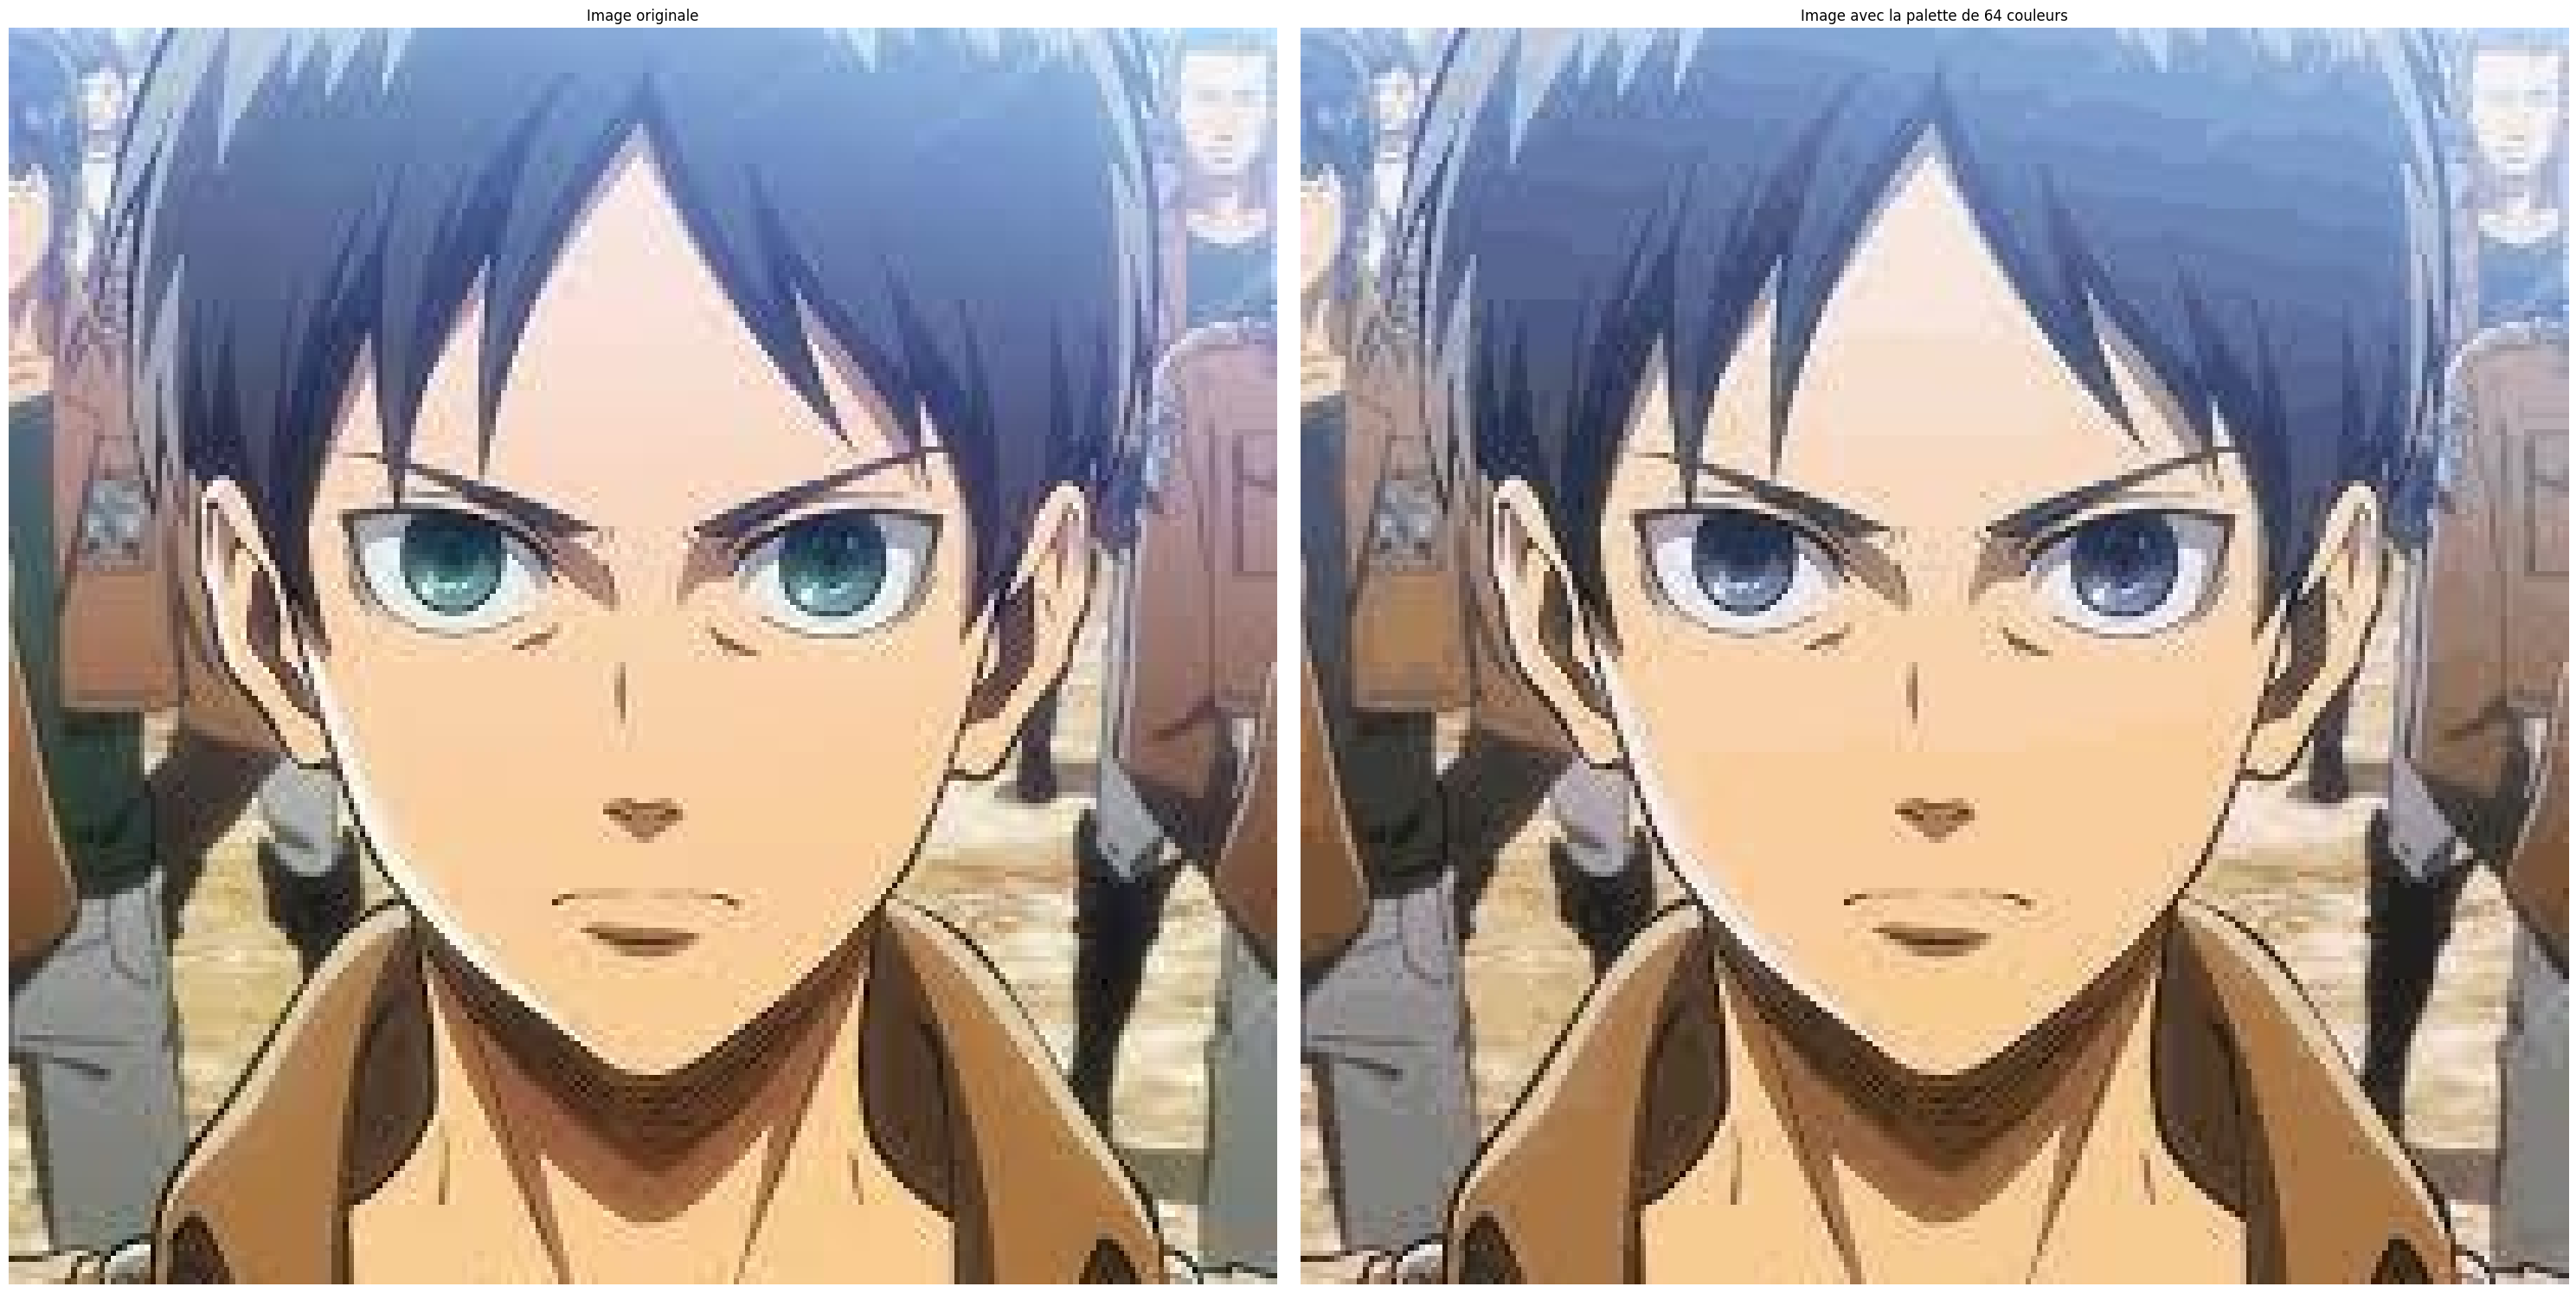

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(30, 15))
fig.subplots_adjust(wspace=0.01)

axs[0].imshow(Image.open(path))
axs[0].set_title('Image originale')
axs[0].axis('off')

axs[1].imshow(Image.open(path2))
axs[1].set_title(f'Image avec la palette de {num_colors} couleurs')
axs[1].axis('off')

fig.tight_layout()

plt.show()

In [27]:
def MSE(image_d_origine, image_traitee):
    # Get the dimensions of the images
    L, C = image_d_origine.shape[:2]  # Assuming it's a 2D image, getting rows and columns
    
    # Convert the images to NumPy arrays
    origine = np.array(image_d_origine)
    traitee = np.array(image_traitee)

    # Calculate the sum of squared differences
    somme_differences_carrees = np.sum((origine - traitee) ** 2)

    # Calculate (1 / (L * C)) * somme
    resultat = (1 / (L * C)) * somme_differences_carrees

    return resultat

# Example usage with two matrices (reconstructed_image and image)
erreur1 = MSE(reconstructed_image, image)
print(f"L'erreur quadratique moyenne (MSE) 1 est: {erreur1}")

L'erreur quadratique moyenne (MSE) 1 est: 92.82917068854569


In [32]:
def taux_compression(img_path, txt_path):
  img = Image.open(img_path)
  data1 = os.path.getsize(txt_path)
  
  if img.mode == 'RGB':
    data2 = os.path.getsize(img_path) * 3 * img.bits
  else:
    data2 = os.path.getsize(img_path) * 1 * img.bits
    
  taux = 1 - (data1/data2)
  
  return taux

In [33]:
taux = taux_compression(path, path1)
print(f"Taux de compression: {100 * taux} %")

Taux de compression: -38.05073035925779 %
